![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) after `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [24]:
# Import necessary libraries
library(tidyverse)

In [25]:
# Load men and women results
men <- read_csv("men_results.csv")
women <- read_csv("women_results.csv")

New names:
• `` -> `...1`
Rows: 44353 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 4884 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
# Some EDA to understand the results
str(men)
str(women)

spc_tbl_ [44,353 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:44353] 0 1 2 3 4 5 6 7 8 9 ...
 $ date      : Date[1:44353], format: "1872-11-30" "1873-03-08" ...
 $ home_team : chr [1:44353] "Scotland" "England" "Scotland" "England" ...
 $ away_team : chr [1:44353] "England" "Scotland" "England" "Scotland" ...
 $ home_score: num [1:44353] 0 4 2 2 3 4 1 0 7 9 ...
 $ away_score: num [1:44353] 0 2 1 2 0 0 3 2 2 0 ...
 $ tournament: chr [1:44353] "Friendly" "Friendly" "Friendly" "Friendly" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 
spc_tbl_ [4,884 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:4884] 0 1 2 3 4 5 6 7 8 9 ...
 $ date      : Date[1:4884], format: "1969-11-01" "196

In [27]:
# Filter matches / date and total goals scored in a single variable 
men <- men %>%
          filter(tournament == "FIFA World Cup", date > "2002-01-01") %>%
          mutate(goals_scored = home_score + away_score)

women <- women %>%
          filter(tournament == "FIFA World Cup", date > "2002-01-01") %>%
          mutate(goals_scored = home_score + away_score)

### Some histogram plots (men and women results)

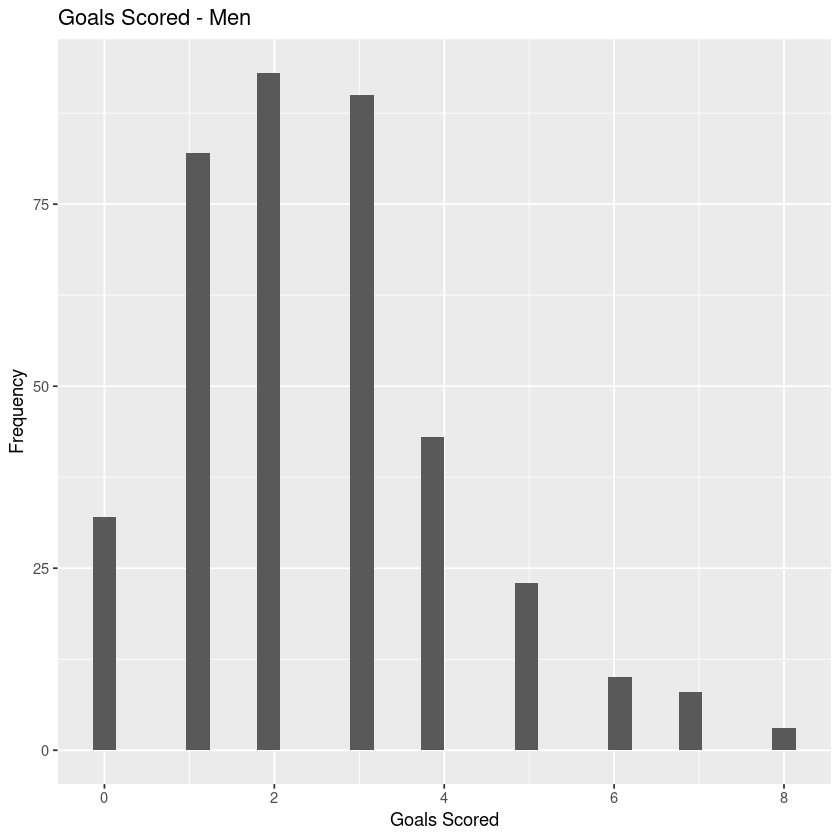

In [28]:
men_plot <- ggplot(men, aes(x = goals_scored)) +
  geom_histogram(bins = 30) +
  ggtitle("Goals Scored - Men") +
  xlab("Goals Scored") +
  ylab("Frequency")

men_plot

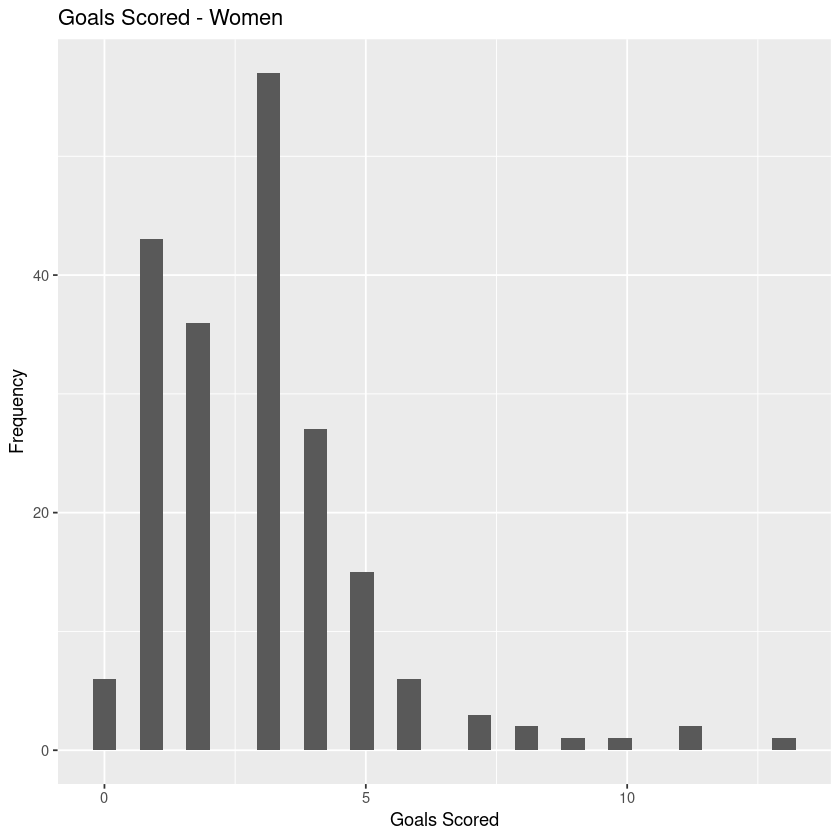

In [29]:
women_plot <- ggplot(women, aes(x = goals_scored)) +
  geom_histogram(bins = 30) +
  ggtitle("Goals Scored - Women") +
  xlab("Goals Scored") +
  ylab("Frequency")

women_plot

### In the plots we can see that the goals results are not normally distributed (and also unpaired two-sample)
### In this case, a test that can be used is the Wilcoxon-Mann-Whitney

In [30]:
# Calculate the test results
test_results <- wilcox.test(
  x = women$goals_scored,
  y = men$goals_scored,
  alternative = "greater"
)

test_results


	Wilcoxon rank sum test with continuity correction

data:  women$goals_scored and men$goals_scored
W = 43273, p-value = 0.005107
alternative hypothesis: true location shift is greater than 0


In [31]:
# Calculate the p_val and result based on the previous test results
p_val <- round(test_results$p.value, 4)
alpha <- 0.10
result <- ifelse(p_val <= alpha, "reject", "fail to reject")

result

[1] "reject"

## Question: 
### Store the p-value and the test result in a data frame called result_df, withp_val as the p-value and result as either the string "fail to reject" or "reject", based on the test outcome.

In [32]:
result_df <- data.frame(p_val, result)
result_df

p_val,result
<dbl>,<chr>
0.0051,reject
